Idea: Exploratory Data Analysis (EDA) on Retail Sales Data

In [2]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load the dataset
df = pd.read_csv("retail_sales_dataset.csv")
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [4]:
# Initial Exploration
df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [6]:
# Checking the shape of dataset
print("Number of Rows in the dataset:", df.shape[0])
print("Number of Columns in the dataset:", df.shape[1])

Number of Rows in the dataset: 1000
Number of Columns in the dataset: 9


In [7]:
# Converted Date to date-time format
df['Date'] = pd.to_datetime(df['Date'])
df['Date']

0     2023-11-24
1     2023-02-27
2     2023-01-13
3     2023-05-21
4     2023-05-06
         ...    
995   2023-05-16
996   2023-11-17
997   2023-10-29
998   2023-12-05
999   2023-04-12
Name: Date, Length: 1000, dtype: datetime64[ns]

In [8]:
# Descriptive statistics
Desc_stats = df[['Age', 'Quantity', 'Price per Unit', 'Total Amount']].describe()
Desc_stats

,Age,Quantity,Price per Unit,Total Amount
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,41.39200,2.514000,179.890000,456.000000
std,13.68143,1.132734,189.681356,559.997632
min,18.00000,1.000000,25.000000,25.000000
25%,29.00000,1.000000,30.000000,60.000000
50%,42.00000,3.000000,50.000000,135.000000
75%,53.00000,4.000000,300.000000,900.000000
max,64.00000,4.000000,500.000000,2000.000000


In [9]:
# Compute mode values separately
mode_values = df[['Age', 'Quantity', 'Price per Unit', 'Total Amount']].mode().iloc[0]
mode_values

Age               43.0
Quantity           4.0
Price per Unit    50.0
Total Amount      50.0
Name: 0, dtype: float64

In [10]:
# Count purchases made by each customers
customer_frequency = df.groupby('Customer ID')['Transaction ID'].count().reset_index()
customer_frequency.columns = ['Customer ID', 'Purchase Frequency']

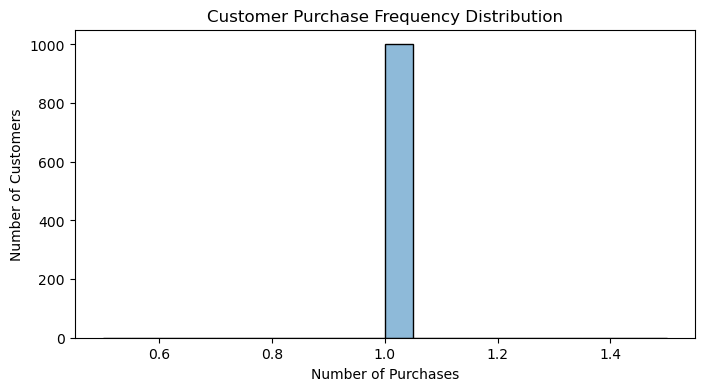

In [11]:
# Visualize customer purchase frequency
plt.figure(figsize = (8, 4))
sns.histplot(customer_frequency['Purchase Frequency'], bins = 20, kde = True)
plt.title('Customer Purchase Frequency Distribution')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')
plt.show()

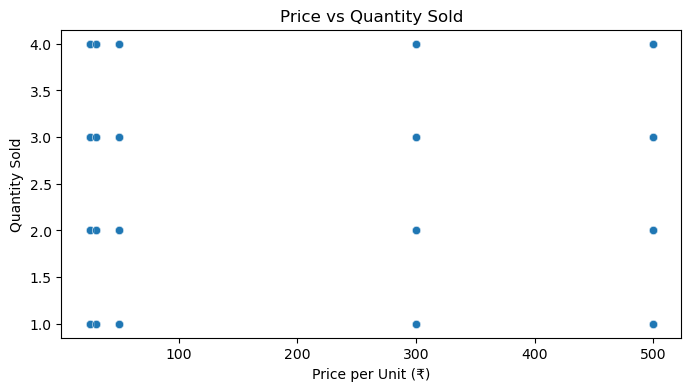

In [12]:
# Analyze the relationship between price and quantity sold
plt.figure(figsize = (8, 4))
sns.scatterplot(x = 'Price per Unit', y = 'Quantity', data = df, alpha=0.7)
plt.title('Price vs Quantity Sold')
plt.xlabel('Price per Unit (₹)')
plt.ylabel('Quantity Sold')
plt.show()

In [13]:
# Extract month and year from 'Date'
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
print(df['Month'])
print(df['Year'])

0      11
1       2
2       1
3       5
4       5
       ..
995     5
996    11
997    10
998    12
999     4
Name: Month, Length: 1000, dtype: int32
0      2023
1      2023
2      2023
3      2023
4      2023
       ... 
995    2023
996    2023
997    2023
998    2023
999    2023
Name: Year, Length: 1000, dtype: int32


In [14]:
# Group by month and year to analyze seasonality
monthly_sales = df.groupby(['Year', 'Month'])['Total Amount'].sum().reset_index()
print("The monthly sales are :", monthly_sales)

The monthly sales are :     Year  Month  Total Amount
0   2023      1         35450
1   2023      2         44060
2   2023      3         28990
3   2023      4         33870
4   2023      5         53150
5   2023      6         36715
6   2023      7         35465
7   2023      8         36960
8   2023      9         23620
9   2023     10         46580
10  2023     11         34920
11  2023     12         44690
12  2024      1          1530


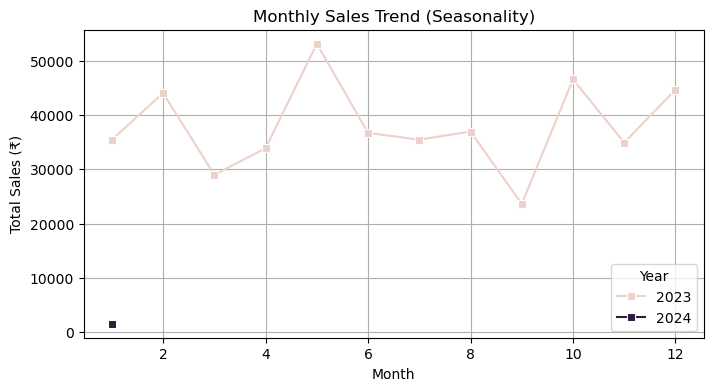

In [15]:
# Plot the monthly sales trend
plt.figure(figsize = (8, 4))
sns.lineplot(x ='Month', y ='Total Amount', hue ='Year', data = monthly_sales, marker ='s')
plt.title('Monthly Sales Trend (Seasonality)')
plt.xlabel('Month')
plt.ylabel('Total Sales (₹)')
plt.grid(True)
plt.show()

In [16]:
# Aggregating total amount by customer
customer_analysis = df.groupby('Customer ID').agg({
    'Total Amount': 'sum',
    'Age': 'mean',
    'Quantity': 'sum'
}).reset_index()
customer_analysis

,Customer ID,Total Amount,Age,Quantity
0,CUST001,150,34.0,3
1,CUST002,1000,26.0,2
2,CUST003,30,50.0,1
3,CUST004,500,37.0,1
4,CUST005,100,30.0,2
...,...,...,...,...
995,CUST995,30,41.0,1
996,CUST996,50,62.0,1
997,CUST997,90,52.0,3
998,CUST998,100,23.0,4


In [17]:
# Most popular product categories
product_analysis = df.groupby('Product Category').agg({
    'Total Amount': 'sum',
    'Quantity': 'sum'
}).reset_index().sort_values(by = 'Total Amount', ascending = False)
product_analysis

,Product Category,Total Amount,Quantity
2,Electronics,156905,849
1,Clothing,155580,894
0,Beauty,143515,771


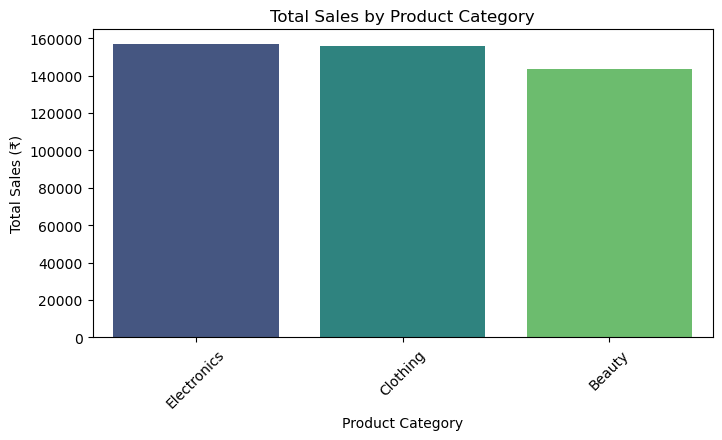

In [18]:
# Bar plot for product categories
plt.figure(figsize = (8, 4))
sns.barplot(x ='Product Category', y = 'Total Amount', data = product_analysis, palette ='viridis')
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales (₹)')
plt.xticks(rotation = 45)
plt.show()

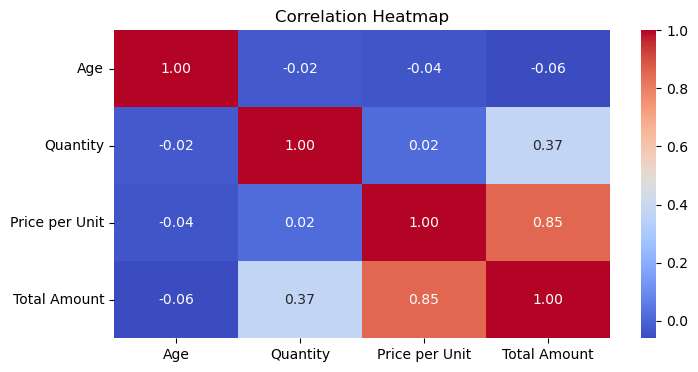

In [19]:
# Heatmap for correlation between numerical variables
plt.figure(figsize = (8, 4))
sns.heatmap(df[['Age', 'Quantity', 'Price per Unit', 'Total Amount']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Recommendations:-
1. Focus on promoting high-performing product categories such as those with high total sales.
2. Offer loyalty programs for frequent customers, as repeat purchases are common.
3. Focusing on pricing strategy if lower prices increase sales volumes, consider offering promotions for high-demand products.
4. Target customers in specific age groups with tailored marketing to boost retention.
5. Prepare for seasonal trends by stocking high-demand products during peak months.